Predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#setting the column names
df.columns = ['Loan_ID', 'Gender', 'Married','Dependents','Education','Self_Employed','Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(613, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [9]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           21
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [11]:
#We have a lot of null values in thedataset - attempting to handle null values

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Fill numerical columns with mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#Verifying null and missing values after handling null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

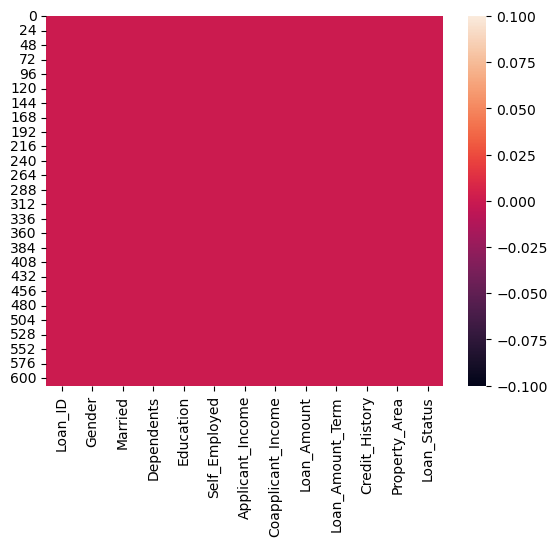

In [13]:
sns.heatmap(df.isnull())

There are no null values in the dataset

In [14]:
print ("Total Duplicate rows are: ",df.duplicated().sum())

Total Duplicate rows are:  0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             613 non-null    object 
 1   Gender              613 non-null    object 
 2   Married             613 non-null    object 
 3   Dependents          613 non-null    object 
 4   Education           613 non-null    object 
 5   Self_Employed       613 non-null    object 
 6   Applicant_Income    613 non-null    int64  
 7   Coapplicant_Income  613 non-null    float64
 8   Loan_Amount         613 non-null    float64
 9   Loan_Amount_Term    613 non-null    float64
 10  Credit_History      613 non-null    float64
 11  Property_Area       613 non-null    object 
 12  Loan_Status         613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: Loan_ID, Length: 613, dtype: int64


Male      501
Female    112
Name: Gender, dtype: int64


Yes    401
No     212
Name: Married, dtype: int64


0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        479
Not Graduate    134
Name: Education, dtype: int64


No     531
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant_Income, Length: 504, dtype: int64


0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: Coapplicant_Income, Length: 287, dtype: int64


146.412162    21
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
21

In [17]:
#checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,613
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant_Income,504
Coapplicant_Income,287
Loan_Amount,204
Loan_Amount_Term,11



These are the unique values present in the dataset.

In [18]:
#Dropping Unnecessary Columns
df.drop("Loan_ID",axis = 1, inplace = True)

In [19]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,84.106098,64.420943,0.349908
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From the statistical summary, We can observe the following

The counts of all columns are the same,
there is no missing values in the dataset The median(50%) is less than the mean in most columns,this means that the data is skewed to the right. 
There is a huge diference between 75% and max meaning there are outliers present in the dataset.
We can also notice the standard deviation,min and 25% percentile values

Univariate Analysis

Male      501
Female    112
Name: Gender, dtype: int64


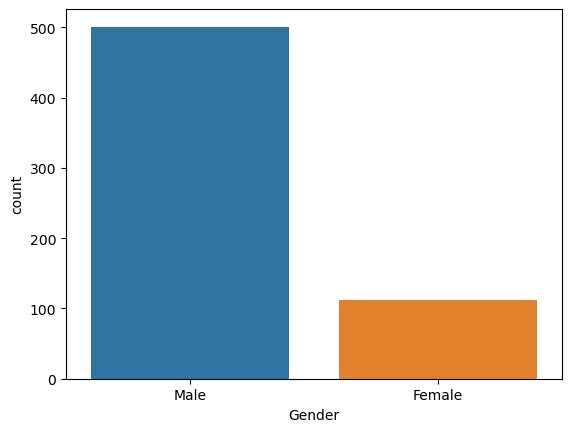

In [20]:
# Visualise the count of Gender of the loan applicants
ax = sns.countplot(x="Gender",data = df)
print(df['Gender'].value_counts())

From the dataset, we can see we have more male loan applicants

Yes    401
No     212
Name: Married, dtype: int64


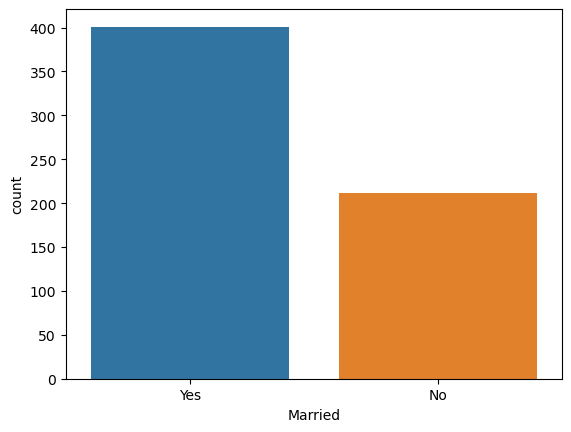

In [21]:
# Visualise the count of Married loan applicants
ax = sns.countplot(x="Married",data = df)
print(df['Married'].value_counts())

We have higher number of married loan applicants

0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


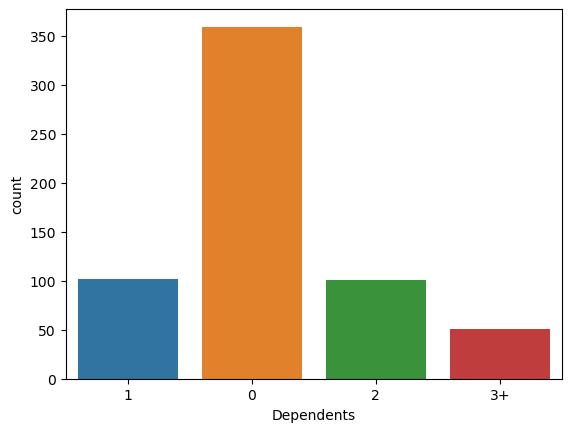

In [22]:
# Visualise the count of Dependents loan applicants have
ax = sns.countplot(x="Dependents",data = df)
print(df['Dependents'].value_counts())

We can see from the analysis that Majority of the loan applicants have no dependents

Graduate        479
Not Graduate    134
Name: Education, dtype: int64


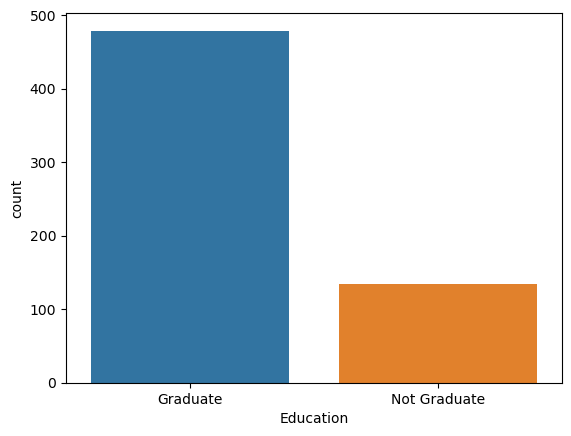

In [23]:
# Visualise the count of Educated loan applicants have
ax = sns.countplot(x="Education",data = df)
print(df['Education'].value_counts())

We can see from the analysis that Majority of the loan applicants are graduates

No     531
Yes     82
Name: Self_Employed, dtype: int64


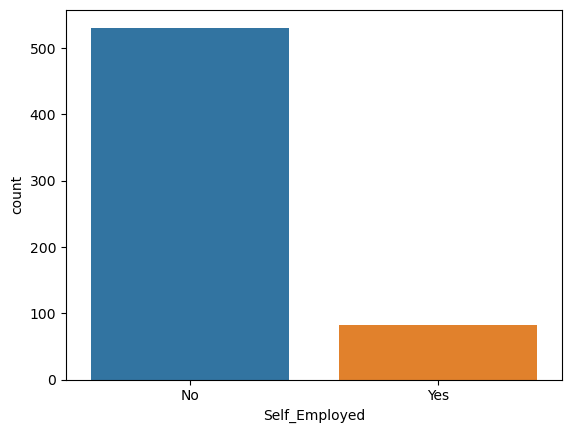

In [24]:
# Visualise the count of Self employed loan applicants have
ax = sns.countplot(x="Self_Employed",data = df)
print(df['Self_Employed'].value_counts())

We can see from the analysis that Majority of the loan applicants are not self employed

1.000000    474
0.000000     89
0.841918     50
Name: Credit_History, dtype: int64


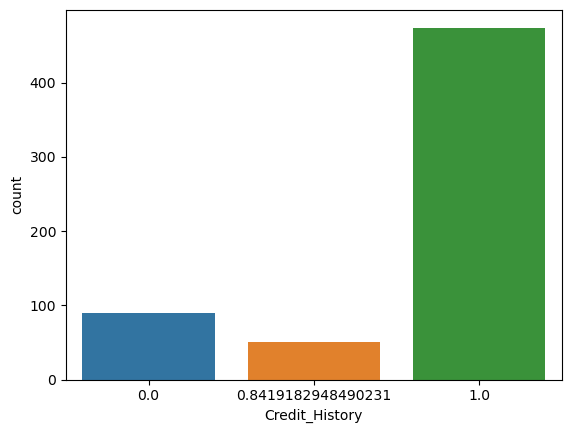

In [25]:
# Visualise the count of Credit_History of loan applicants
ax = sns.countplot(x="Credit_History",data = df)
print(df['Credit_History'].value_counts())

Y    421
N    192
Name: Loan_Status, dtype: int64


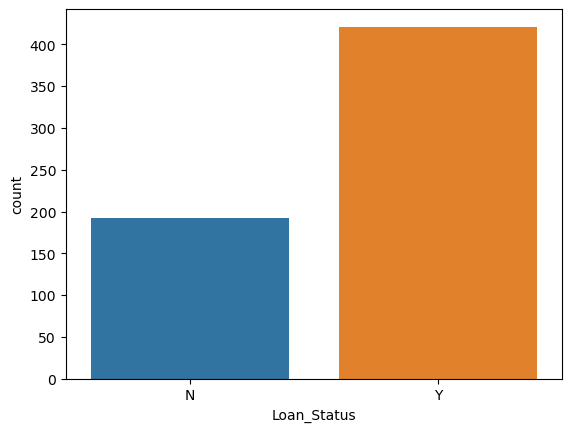

In [26]:
# Visualise the count of Credit_History of loan applicants
ax = sns.countplot(x="Loan_Status",data = df)
print(df['Loan_Status'].value_counts())

We can see from the analysis that majority of the loan applicants have a previous loan credit history

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64


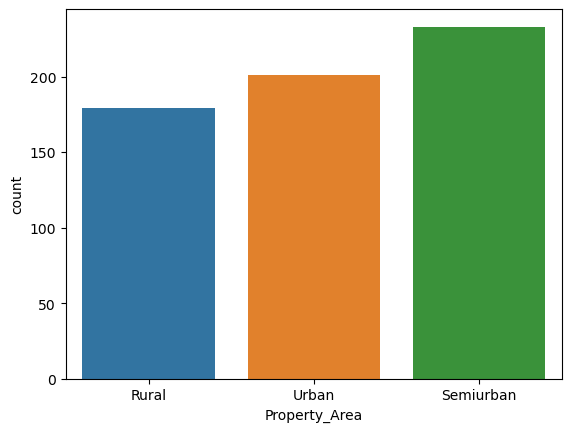

In [27]:
# Visualise the count of property area of loan applicants
ax = sns.countplot(x="Property_Area",data = df)
print(df['Property_Area'].value_counts())

Semiurban areas makes up majority of the total area within the boundaries of the property set out inthe schedule

Bivariate analysis

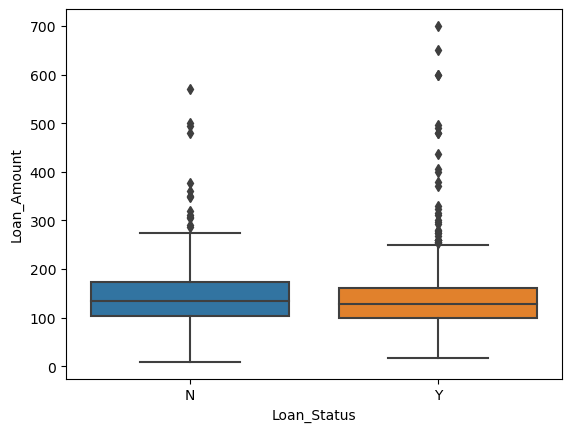

In [29]:
#Box Plot of Loan Amount by Loan Status
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df)
plt.show()

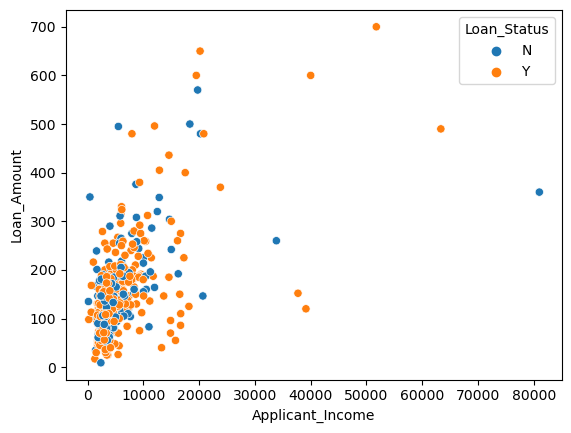

In [30]:
sns.scatterplot(x='Applicant_Income', y='Loan_Amount', hue='Loan_Status', data=df)
plt.show()


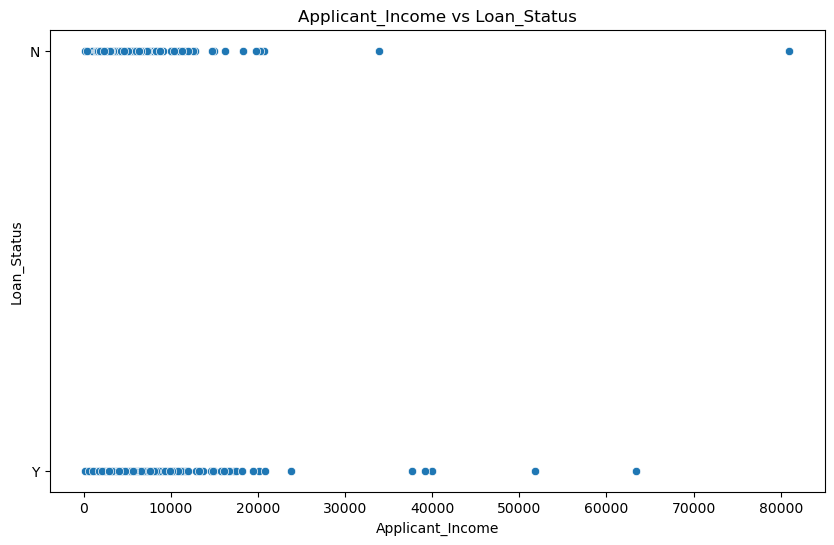

In [31]:
# Scatter plot comparing Applicant_Income and Loan_Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applicant_Income', y='Loan_Status', data=df)
plt.title('Applicant_Income vs Loan_Status')
plt.xlabel('Applicant_Income')
plt.ylabel('Loan_Status')
plt.show()

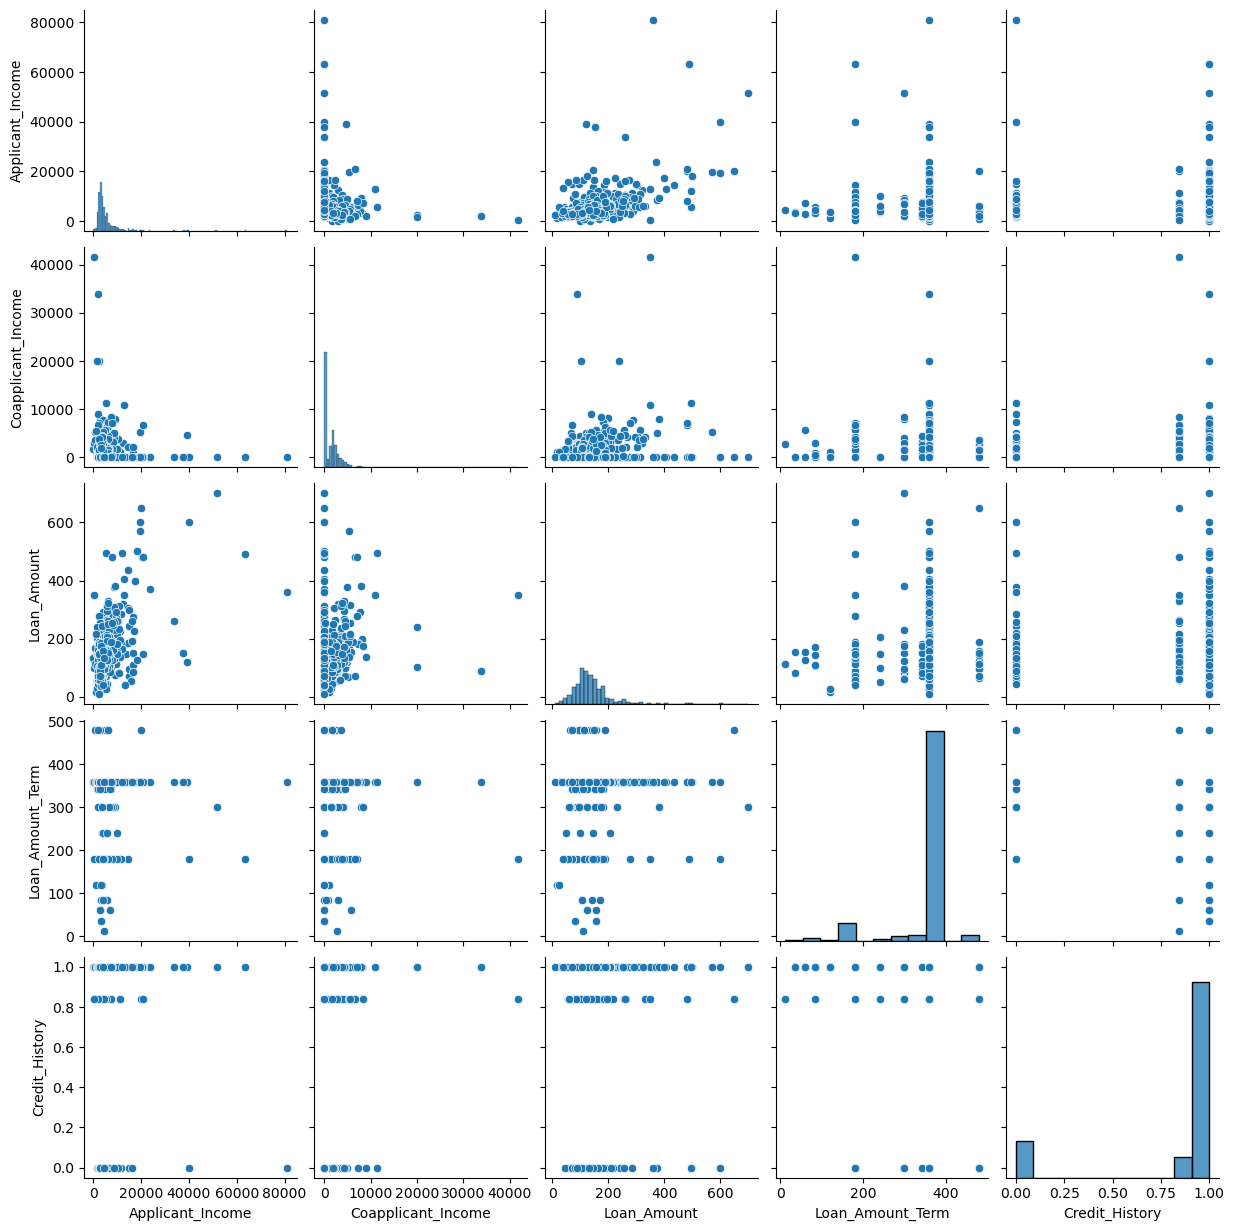

In [32]:
# Pairplot for pairwise relationships
sns.pairplot(df)
plt.show()

In [33]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
609,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
610,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
611,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


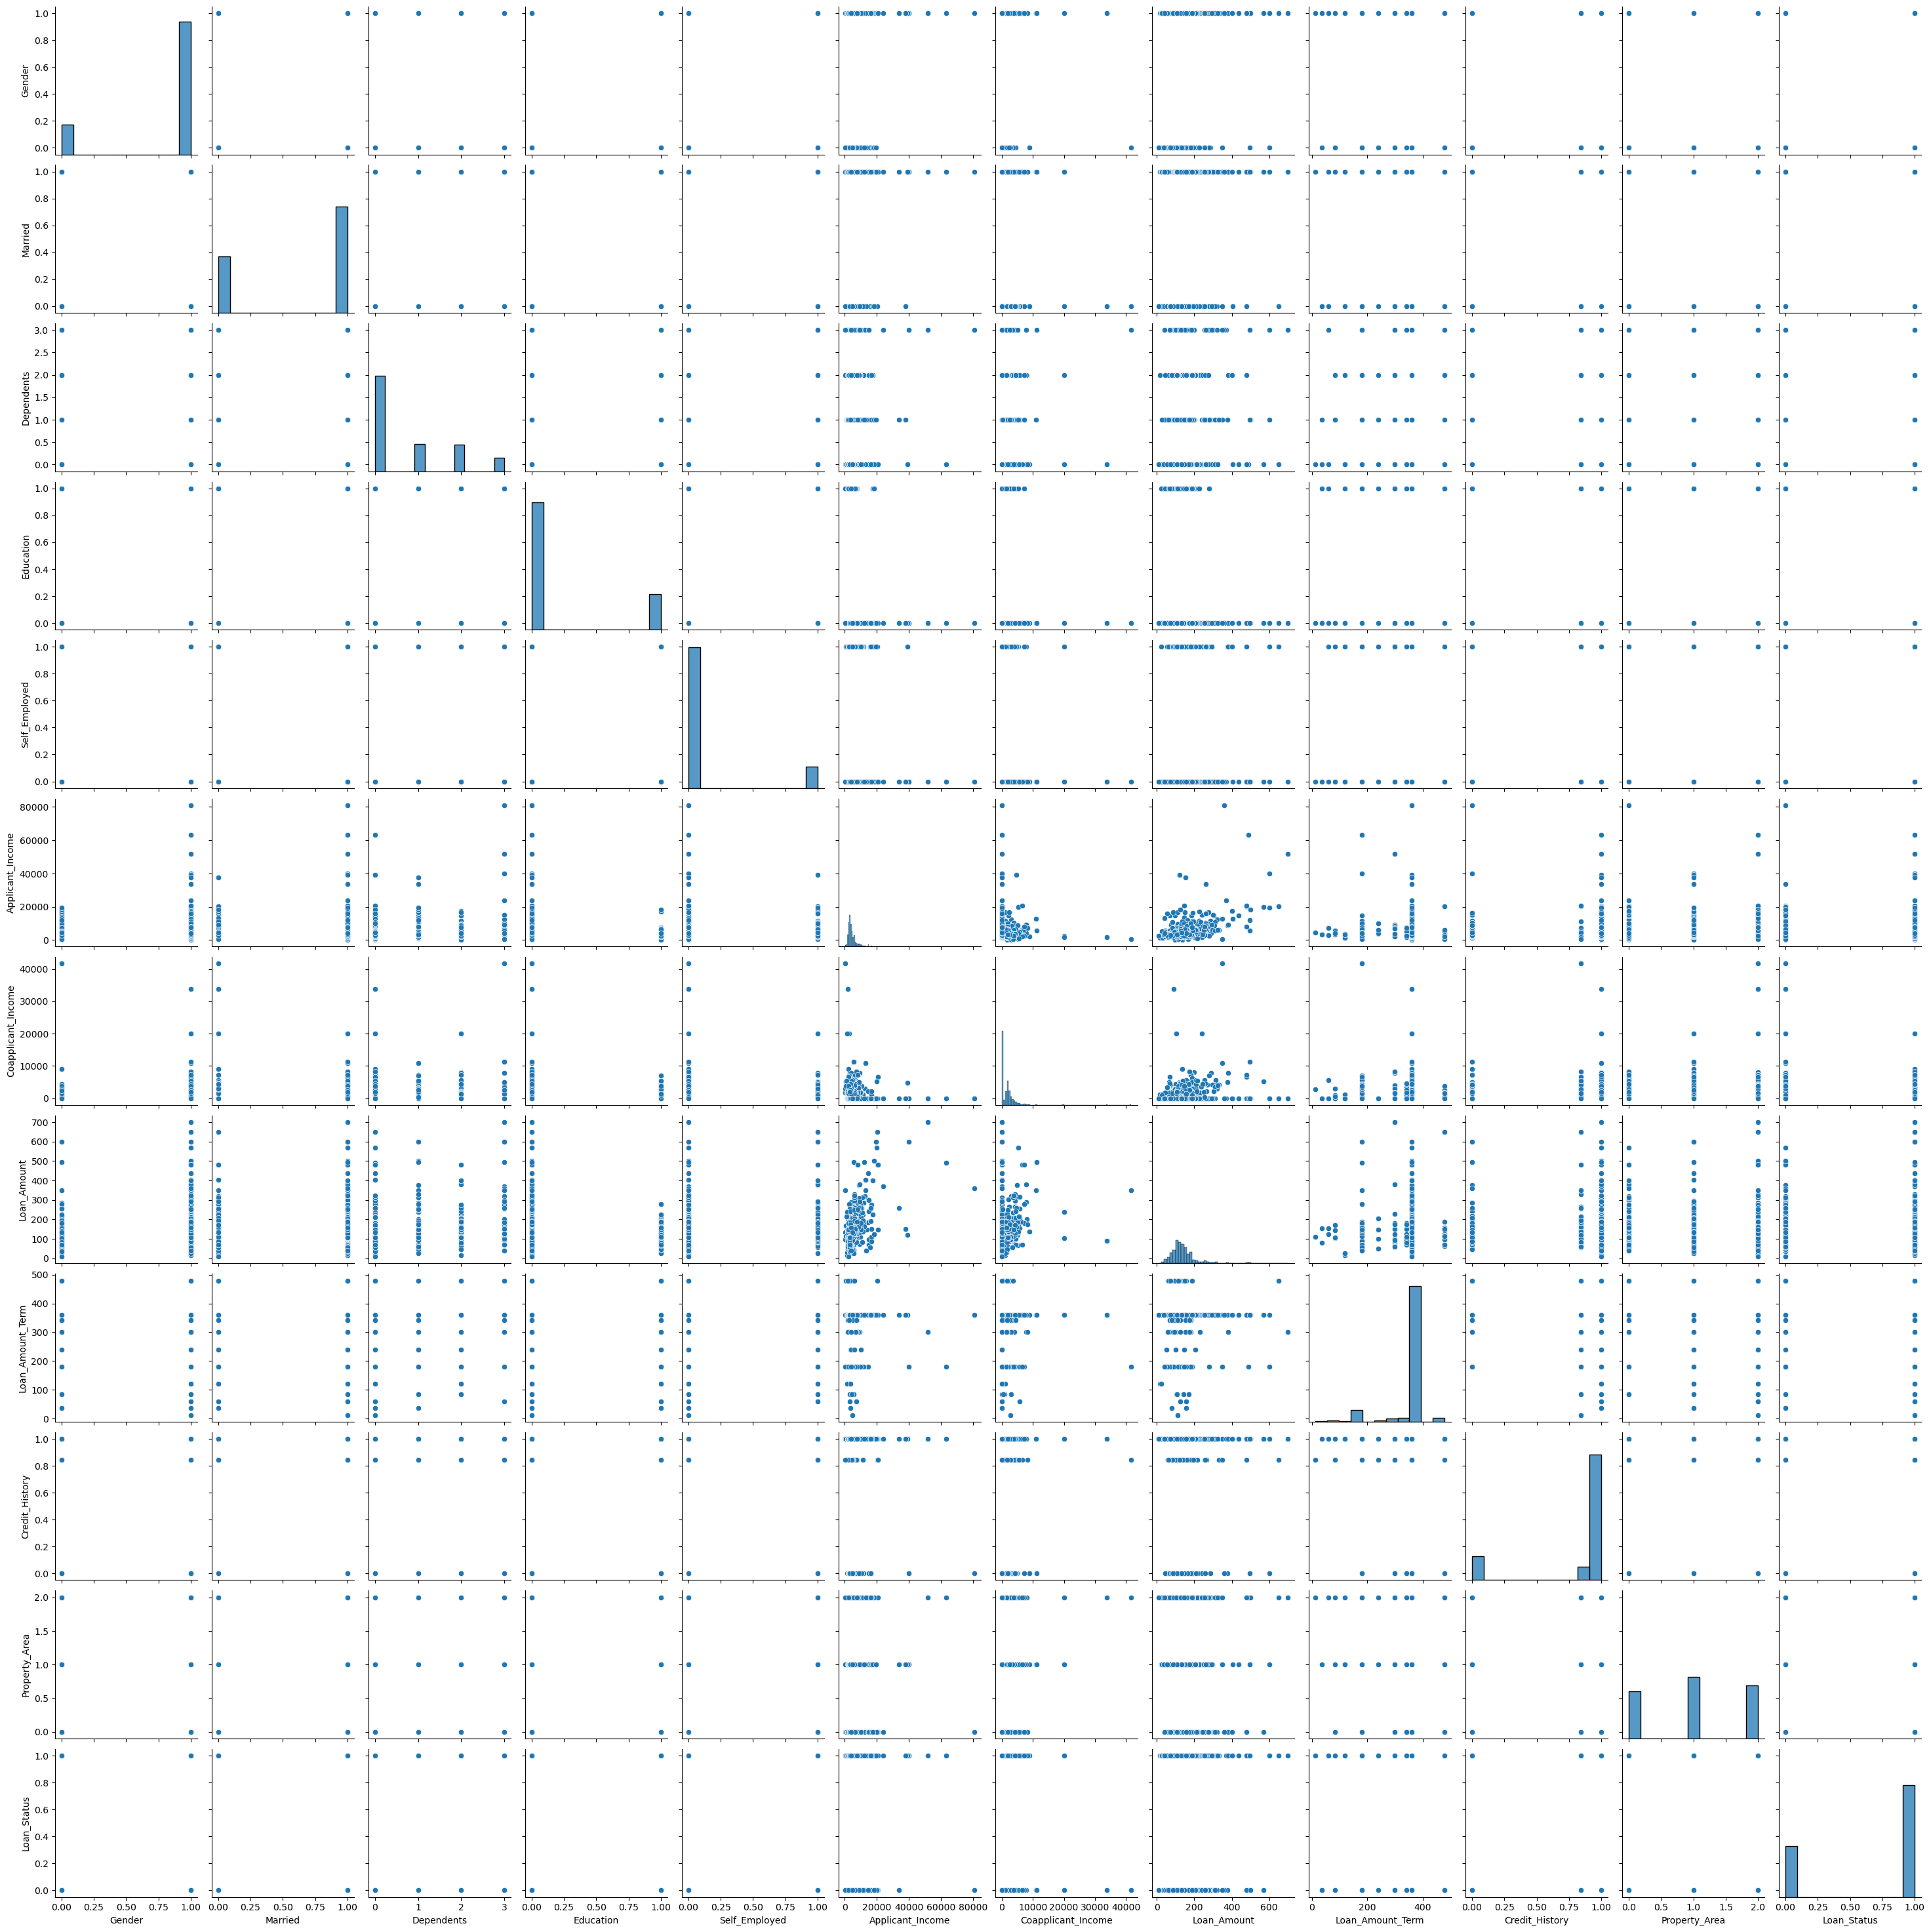

In [34]:
# Pairplot for pairwise relationships
sns.pairplot(df)
plt.show()

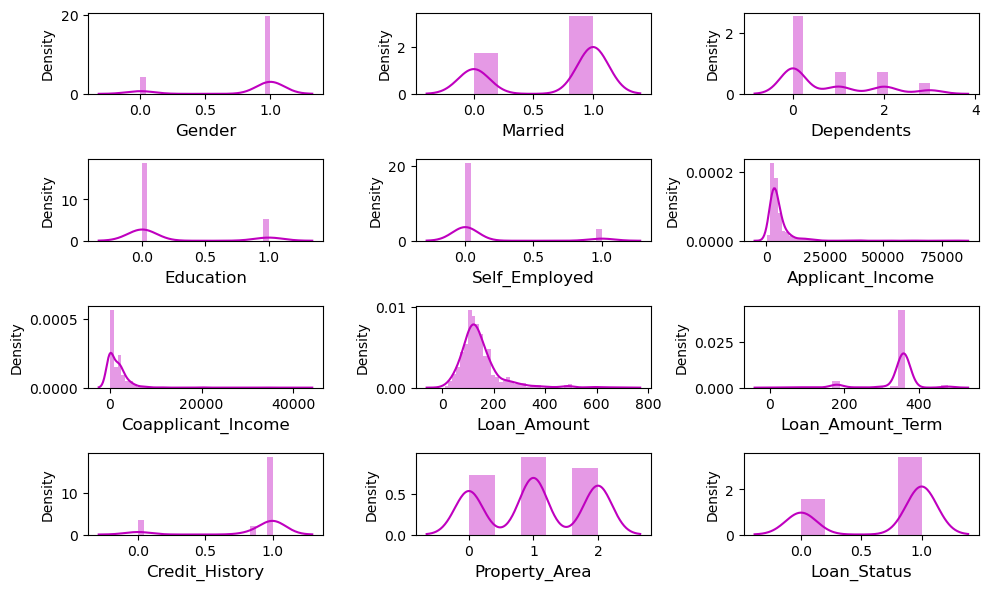

In [35]:
#To check data that have been distributed in remaining columns
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

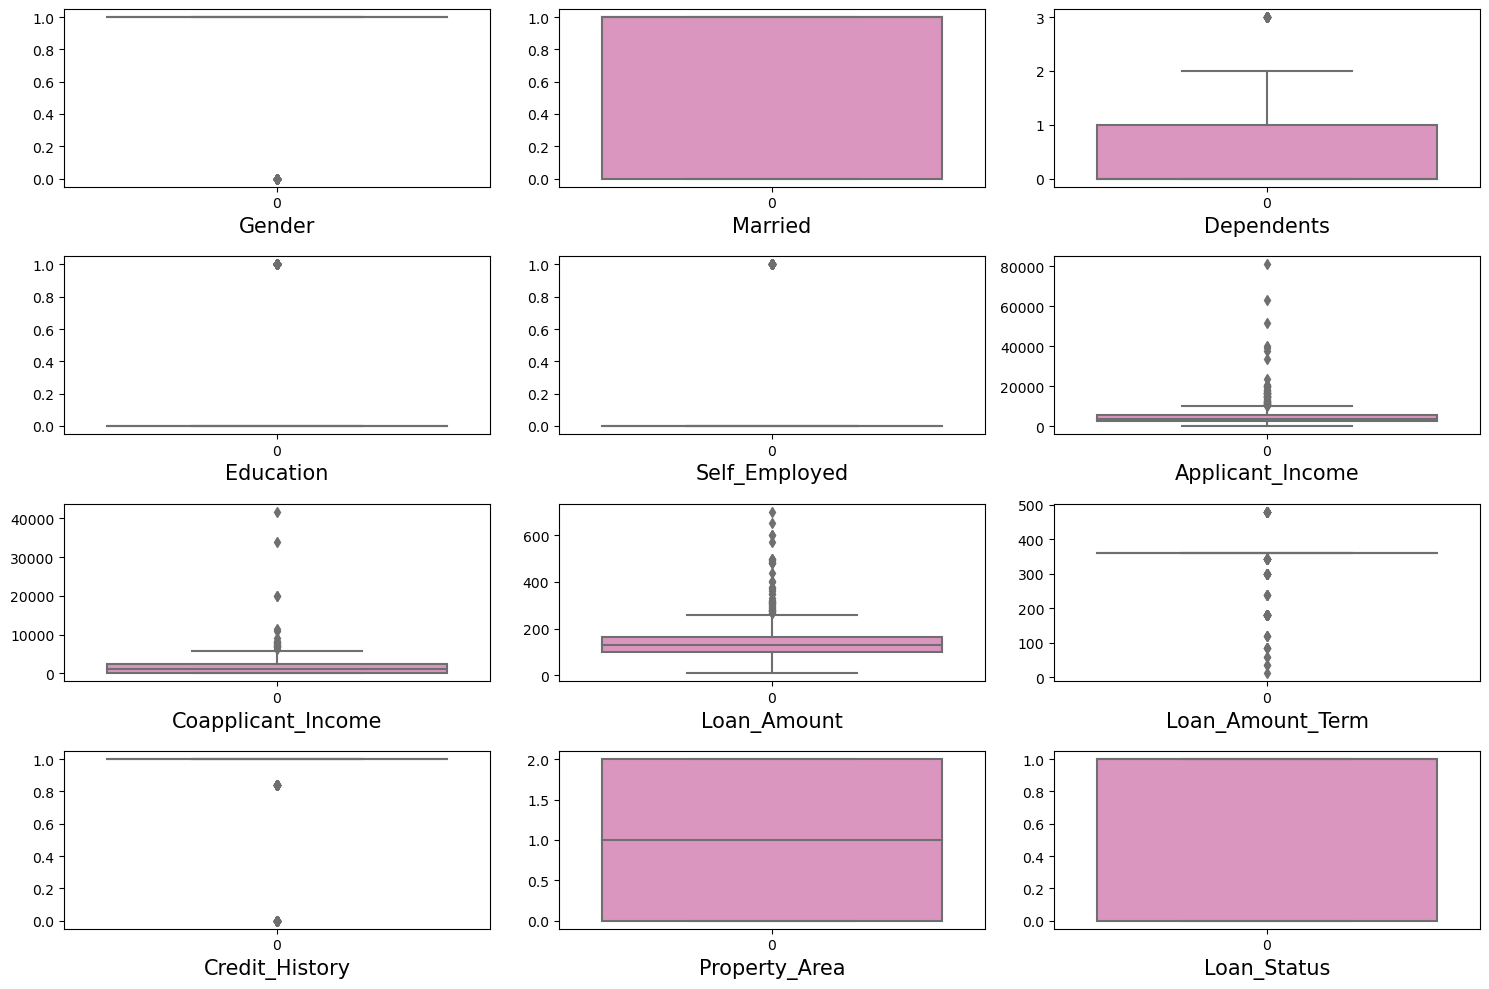

In [36]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in df:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Most columns have outliers so we will try to remove using zscore method

In [37]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
z_scores

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472814,0.727103,0.252172,0.528913,0.392970,0.134184,0.039614,0.219095,0.280107,0.452149,1.317053,1.48078
1,0.472814,0.727103,0.738736,0.528913,2.544722,0.393309,0.555079,0.956861,0.280107,0.452149,1.225793,0.67532
2,0.472814,0.727103,0.738736,1.890668,0.392970,0.461569,0.250933,0.314290,0.280107,0.452149,1.225793,0.67532
3,0.472814,1.375322,0.738736,0.528913,0.392970,0.097768,0.555079,0.064402,0.280107,0.452149,1.225793,0.67532
4,0.472814,0.727103,1.243081,0.528913,2.544722,0.002335,0.879199,1.434929,0.280107,0.452149,1.225793,0.67532
...,...,...,...,...,...,...,...,...,...,...,...,...
608,2.114997,1.375322,0.738736,0.528913,0.392970,0.409679,0.555079,0.897364,0.280107,0.452149,1.317053,0.67532
609,0.472814,0.727103,2.233989,0.528913,0.392970,0.212265,0.555079,1.266247,2.516297,0.452149,1.317053,0.67532
610,0.472814,0.727103,0.252172,0.528913,0.392970,0.436939,0.473042,1.268337,0.280107,0.452149,1.225793,0.67532
611,0.472814,0.727103,1.243081,0.528913,0.392970,0.356893,0.555079,0.482973,0.280107,0.452149,1.225793,0.67532


In [38]:
# Set the threshold for what constitutes an outlier
threshold = 3

# Identify rows where any value in the row exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = df[~outliers]

# Display the cleaned DataFrame
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
609,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
610,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
611,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


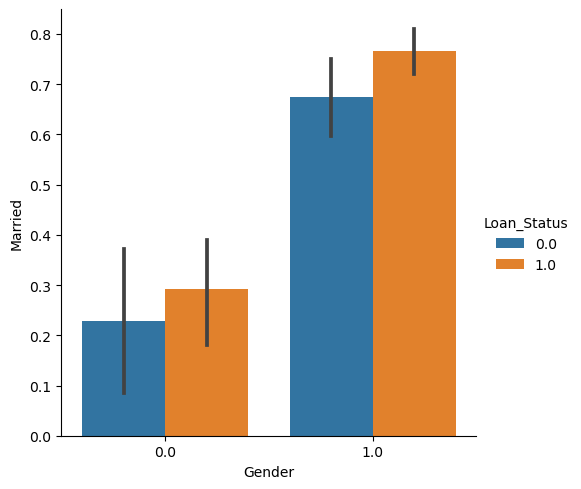

In [44]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=df)

In [39]:
#checking for skewness
df.skew()

Gender               -1.620181
Married              -0.635432
Dependents            1.049515
Education             1.303909
Self_Employed         2.249864
Applicant_Income      2.149534
Coapplicant_Income    1.348577
Loan_Amount           1.113223
Loan_Amount_Term     -2.074273
Credit_History       -1.918846
Property_Area        -0.052313
Loan_Status          -0.819913
dtype: float64

In [40]:
#removing skewness using cuberoot method
df['Self_Employed'] = np.cbrt(df['Self_Employed'])
df['Applicant_Income'] = np.cbrt(df['Applicant_Income'])

In [41]:
#checking for skewness
df.skew()

Gender               -1.620181
Married              -0.635432
Dependents            1.049515
Education             1.303909
Self_Employed         2.249864
Applicant_Income      0.848801
Coapplicant_Income    1.348577
Loan_Amount           1.113223
Loan_Amount_Term     -2.074273
Credit_History       -1.918846
Property_Area        -0.052313
Loan_Status          -0.819913
dtype: float64

In [42]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.380814,0.188884,0.046166,-0.005894,0.049065,0.191417,0.159840,-0.104635,0.016199,-0.027398,0.016863
Married,0.380814,1.000000,0.328869,0.023579,-0.016708,-0.016950,0.235817,0.165856,-0.126933,0.014459,0.013538,0.090795
Dependents,0.188884,0.328869,1.000000,0.069182,0.044090,0.101716,-0.027331,0.135907,-0.083491,-0.016475,0.003875,0.018730
Education,0.046166,0.023579,0.069182,1.000000,-0.007500,-0.178248,-0.038625,-0.146466,-0.094439,-0.080535,-0.067547,-0.092087
Self_Employed,-0.005894,-0.016708,0.044090,-0.007500,1.000000,0.231364,-0.040172,0.122033,-0.033194,-0.014599,-0.027482,-0.026095
Applicant_Income,0.049065,-0.016950,0.101716,-0.178248,0.231364,1.000000,-0.238106,0.468756,-0.064052,0.039693,-0.013527,-0.005451
Coapplicant_Income,0.191417,0.235817,-0.027331,-0.038625,-0.040172,-0.238106,1.000000,0.309963,-0.060031,-0.018571,-0.091850,0.046059
Loan_Amount,0.159840,0.165856,0.135907,-0.146466,0.122033,0.468756,0.309963,1.000000,0.040233,0.005944,-0.076245,-0.035519
Loan_Amount_Term,-0.104635,-0.126933,-0.083491,-0.094439,-0.033194,-0.064052,-0.060031,0.040233,1.000000,0.030251,-0.059584,-0.018427
Credit_History,0.016199,0.014459,-0.016475,-0.080535,-0.014599,0.039693,-0.018571,0.005944,0.030251,1.000000,-0.010738,0.561641


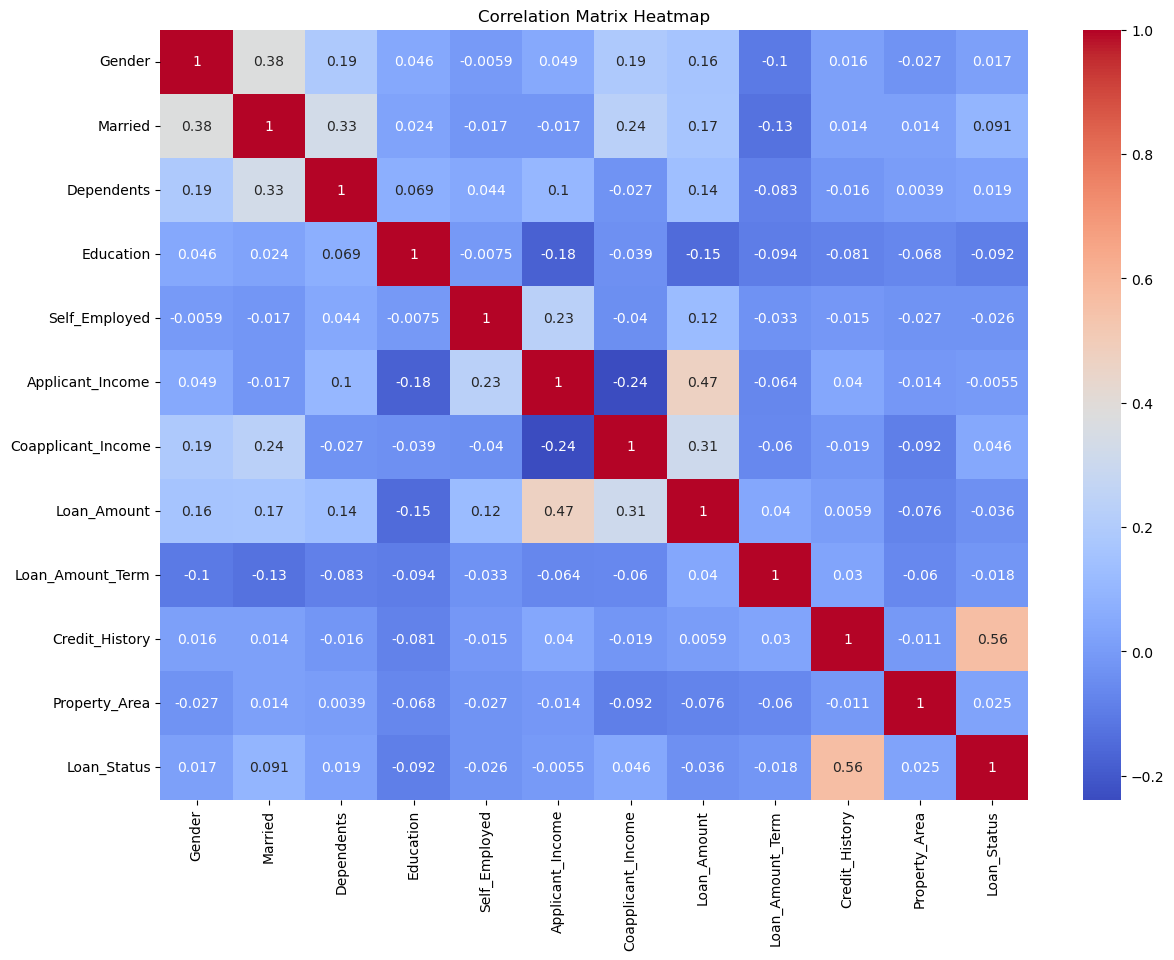

In [43]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Model Building Using machine learning algorithms 

Predicting Loan_Status (Classification Problem) because the target variable is categorical

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [46]:
# Split the dataset into features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7931034482758621
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.48        35
         1.0       0.77      1.00      0.87        81

    accuracy                           0.79       116
   macro avg       0.89      0.66      0.67       116
weighted avg       0.84      0.79      0.75       116



In [50]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6551724137931034
              precision    recall  f1-score   support

         0.0       0.43      0.46      0.44        35
         1.0       0.76      0.74      0.75        81

    accuracy                           0.66       116
   macro avg       0.60      0.60      0.60       116
weighted avg       0.66      0.66      0.66       116



In [51]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7844827586206896
              precision    recall  f1-score   support

         0.0       0.81      0.37      0.51        35
         1.0       0.78      0.96      0.86        81

    accuracy                           0.78       116
   macro avg       0.80      0.67      0.69       116
weighted avg       0.79      0.78      0.76       116



In [52]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7672413793103449
              precision    recall  f1-score   support

         0.0       0.75      0.34      0.47        35
         1.0       0.77      0.95      0.85        81

    accuracy                           0.77       116
   macro avg       0.76      0.65      0.66       116
weighted avg       0.76      0.77      0.74       116



In [53]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.7931034482758621
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.48        35
         1.0       0.77      1.00      0.87        81

    accuracy                           0.79       116
   macro avg       0.89      0.66      0.67       116
weighted avg       0.84      0.79      0.75       116



In [54]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp_clf = MLPClassifier(max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network
Accuracy: 0.7672413793103449
              precision    recall  f1-score   support

         0.0       0.70      0.40      0.51        35
         1.0       0.78      0.93      0.85        81

    accuracy                           0.77       116
   macro avg       0.74      0.66      0.68       116
weighted avg       0.76      0.77      0.75       116



The best model is Logistic Regression Accuracy because it has the highest accuracy score: 0.7931034482758621

Hyperparameter Tuning on the best model Logistic Regression

In [57]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Logistic Regression Model Accuracy:", accuracy)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

Best Logistic Regression Model Accuracy: 0.7931034482758621
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.48        35
         1.0       0.77      1.00      0.87        81

    accuracy                           0.79       116
   macro avg       0.89      0.66      0.67       116
weighted avg       0.84      0.79      0.75       116

